# 

# Predicting the price of a Football player

## Problem Statement 

In the English Premier League, May - July represents a lull period due to the lack of club football. What makes up for it, is the intense transfer speculation that surrounds all major player transfers today. An important part of negotiations is predicting the fair market price for a player. Our task is to predict this Market Value of a player using the data provided below

The attached data set consists of the following attributes:
- name: Name of the player
- club: Club of the player
- age : Age of the player
- position : The usual position on the pitch
- position_cat :
   - 1 for attackers

   - 2 for midfielders

   - 3 for defenders

   - 4 for goalkeepers

- market_value : As on transfermrkt.com on July 20th, 2017
- page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017
- fpl_value : Value in Fantasy Premier League as on July 20th, 2017
- fpl_sel : % of FPL players who have selected that player in their team
- fpl_points : FPL points accumulated over the previous season
- region:
    - 1 for England
    - 2 for EU
    - 3 for Americas
    - 4 for Rest of World

- nationality
- new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)
- age_cat
- club_id
- big_club: Whether one of the Top 6 clubs
- new_signing: Whether a new signing for 2017/18 (till 20th July)


Regression algorithms we will be using: 
- Linear Regression
- Lasso Regression 
- Ridge Regression 
- Nearest Neighbour Regression 
- Support Vector Regression  
- Tree Regression 
- Random Forest Regression 
- Gradient Boosted Regression. 

In [133]:
import numpy as np
import  pandas as pd

In [134]:
df = pd.read_csv('D:/div/ML/Projects/Player-Market-Value-Prediction/Notebook/Dataset/Data set__1682565729-62fcaa4ea2bc0b6439d2306a.csv')
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


#### Checking the shape of dataset 

In [135]:
df.shape

(461, 17)

We have 461 rows and 17 columns  

In [136]:
df.dtypes #Data Types

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

### Checking For Duplicates Values

In [137]:
df.duplicated().sum()

0

We have 0 duplicated rows in our dataset

### Checking for missing values and handling them

In [138]:
df.isna().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

As we can see in 'region' there is only 1 missing value

In [139]:
missing_row = df[df['region'].isnull()]
missing_row

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
188,Steve Mounie,Huddersfield,22,CF,1,5.5,56,6.0,0.60%,0,NaN,Benin,0,2,8,0,0


In [140]:
#df['region'] = df['region'].fillna(df['region'].mode()[0])
df.fillna(1.0, inplace=True)


In [141]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [142]:
df.iloc[188]

name            Steve Mounie
club            Huddersfield
age                       22
position                  CF
position_cat               1
market_value             5.5
page_views                56
fpl_value                6.0
fpl_sel                0.60%
fpl_points                 0
region                   1.0
nationality            Benin
new_foreign                0
age_cat                    2
club_id                    8
big_club                   0
new_signing                0
Name: 188, dtype: object

#### Knowing More about data

In [143]:
df.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.991323,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957766,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


### So here we can see we have four categorical features which will be required to encoded to int or float type 


In [144]:
df['club'].unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [146]:
df['position'].unique()

array(['LW', 'AM', 'GK', 'RW', 'CB', 'RB', 'CF', 'LB', 'DM', 'RM', 'CM',
       'SS', 'LM'], dtype=object)

In [147]:
df['fpl_sel'].unique()

array(['17.10%', '5.60%', '5.90%', '1.50%', '0.70%', '13.70%', '2.50%',
       '4.70%', '4.00%', '1.00%', '2.00%', '1.80%', '0.00%', '5.10%',
       '1.70%', '0.10%', '0.50%', '0.80%', '4.20%', '0.20%', '0.40%',
       '6.90%', '26.50%', '10.40%', '15.00%', '19.80%', '0.60%', '0.90%',
       '1.60%', '11.50%', '1.10%', '3.30%', '9.30%', '2.10%', '4.10%',
       '8.00%', '3.20%', '4.80%', '0.30%', '1.30%', '13.50%', '2.90%',
       '1.20%', '2.30%', '3.00%', '12.00%', '12.40%', '12.30%', '7.80%',
       '18.50%', '20.30%', '7.50%', '9.00%', '5.00%', '13.80%', '6.40%',
       '20.90%', '10.50%', '2.70%', '10.90%', '1.40%', '16.40%', '10.00%',
       '13.10%', '6.30%', '14.60%', '3.60%', '2.40%', '2.60%', '3.50%',
       '5.50%', '30.80%', '5.30%', '7.10%', '4.50%', '6.60%', '4.30%',
       '17.50%', '9.70%', '3.80%', '8.80%', '15.20%', '4.60%', '45.00%',
       '26.10%', '6.20%', '19.50%', '10.20%', '7.70%', '17.00%', '5.20%',
       '11.40%', '2.80%', '7.30%', '11.30%', '11.20%', '4.90%

In [148]:
df['nationality'].unique()

array(['Chile', 'Germany', 'Czech Republic', 'England', 'France', 'Spain',
       'Nigeria', 'Switzerland', 'Wales', 'Brazil', 'Egypt', 'Argentina',
       'Colombia', 'Bosnia', 'Norway', 'Poland', 'Scotland', 'Congo DR',
       'Ireland', 'Netherlands', 'Australia', "Cote d'Ivoire", 'Finland',
       'Cameroon', 'Austria', 'Israel', 'Northern Ireland', 'Canada',
       'Belgium', 'Iceland', 'Serbia', 'Portugal', 'Ghana', 'South Korea',
       'Mali', 'Senegal', 'Curacao', 'Denmark', 'Slovenia',
       'Trinidad and Tobago', 'Bermuda', 'Benin', 'Algeria', 'Jamaica',
       'Japan', 'Tunisia', 'Croatia', 'Estonia', 'Ecuador', 'Armenia',
       'Italy', 'Sweden', 'United States', 'Morocco', 'The Gambia',
       'Kenya', 'Greece', 'Uruguay', 'Romania', 'Venezuela',
       'New Zealand'], dtype=object)

### Before Encoding we will start with Visualization process first in order to capture insights and relationship using Seaborn

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        461 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
numeric_cols = ['age','market_value','page_views','fpl_value','fpl_points']

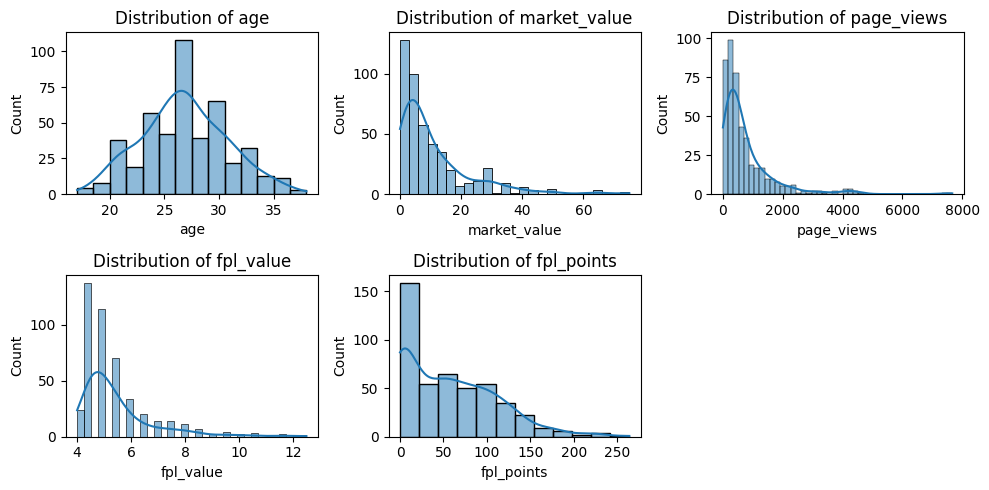

In [152]:
plt.figure(figsize=(10,5))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(2,3,i)
    sns.histplot(df[col],kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Here are some insights:

1. **Age Distribution**: 
   - The Gaussian distribution of ages centered around 25 to 30 reflects that a significant number of players fall within that age range. Understanding the age distribution can be crucial, as it may indicate the age range where players are most active or have the highest market value.

2. **Market Value Distribution**:
   - The distribution of market values with higher counts at lower values and a decrease as values increase suggests that the majority of players may have lower market values, with fewer players having higher market values. It is important to consider the spread and concentration of market values while building predictive models.

3. **Page Views, FPL Value, FPL Points**:
   - Similar decreasing trends in the distributions of page views, FPL value, and FPL points indicate that there may be a concentration of lower values with fewer players having higher values. These metrics like page views and FPL performance can impact a player's popularity and potential market value.

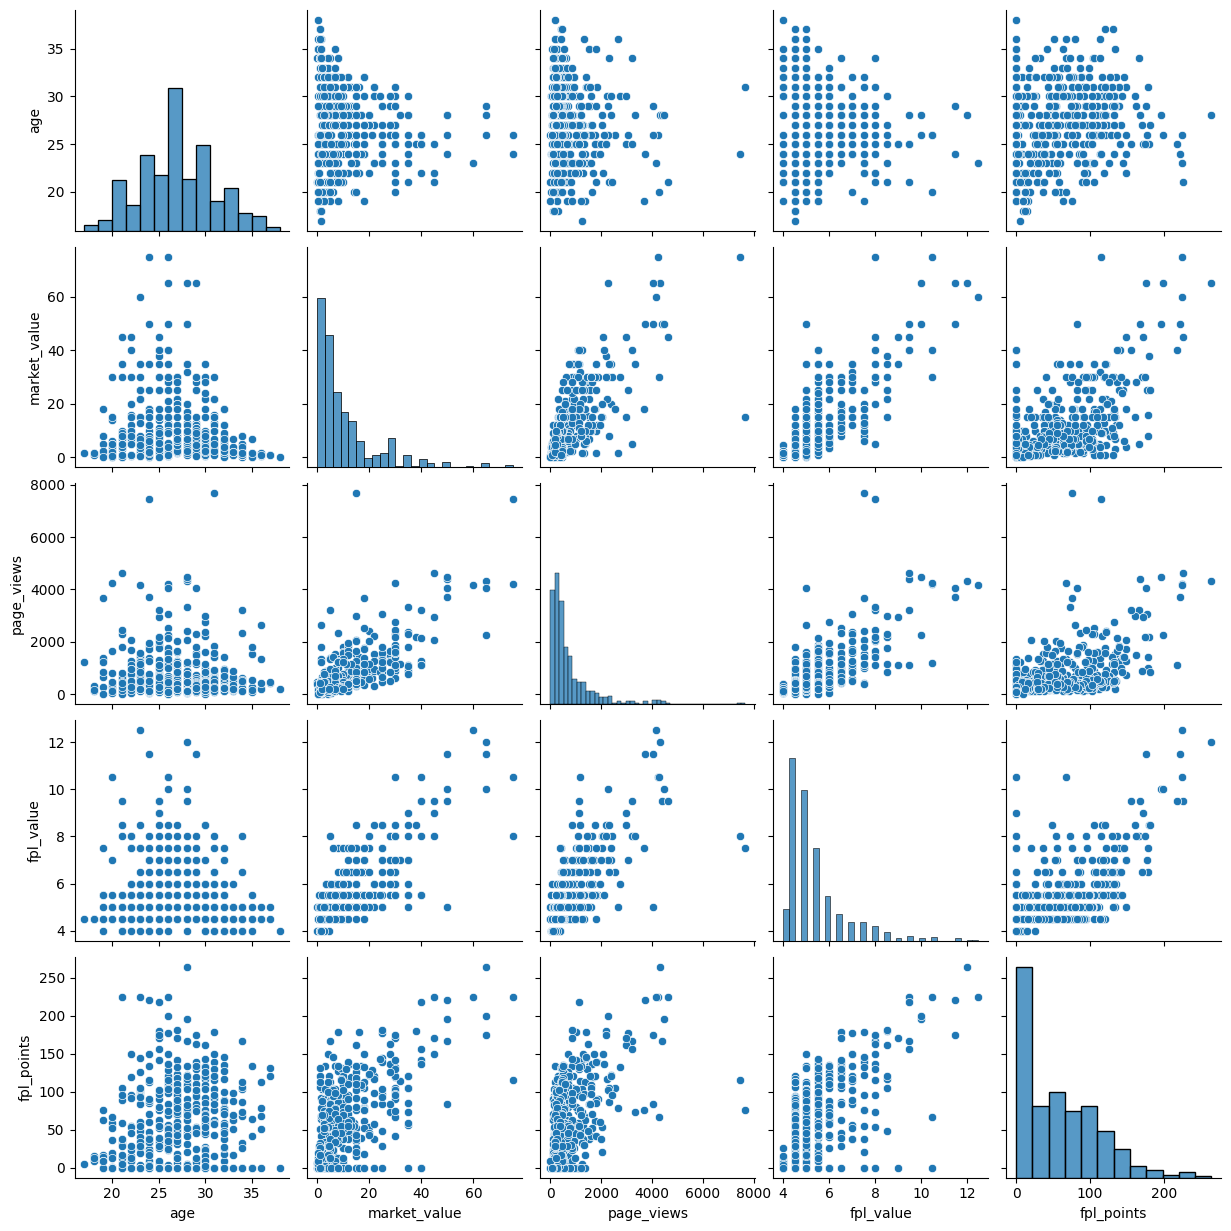

In [153]:
sns.pairplot(data = df, vars=['age','market_value','page_views','fpl_value','fpl_points'],kind='scatter')
plt.show()

Here's a summary of the observations:

1. **Age and Market Value**:
   - There is a negative correlation between age and market value, indicating that as players' age increases, their market value tends to decrease. The spike in market value for players aged between 25 to 30 may be due to the potential and peak performance of younger players during that age range.

2. **Page Views and Market Value**:
   - A positive correlation between page views and market value suggests that players with higher market values attract more attention and page views, likely due to their popularity and performance.

3. **FPL Value and Market Value**:
   - The positive correlation between FPL value and market value indicates that players with higher market values tend to have higher Fantasy Premier League values, potentially reflecting their on-field performance and market appeal.

4. **FPL Points and Page Views**:
   - A somewhat positive correlation between FPL points and page views suggests that players with more page views may have higher FPL points, possibly indicating public interest or player performance influencing both metrics.

5. **Age and Other Variables**:
   - Age shows no significant correlations with page views, FPL value, or FPL points, implying that age alone may not strongly impact these variables compared to market value.

#### Let's See relationship between Target Variable i.e.,Market value and (Position,Nationality and Club)

<Axes: xlabel='market_value', ylabel='Count'>

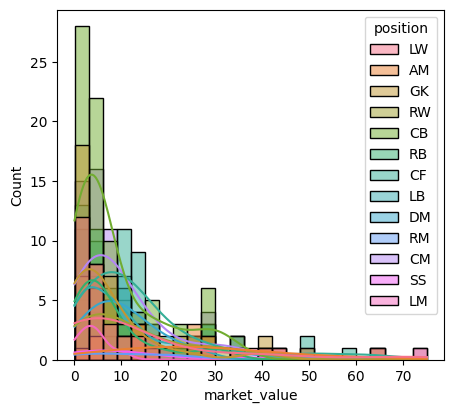

In [154]:
plt.figure(figsize=(5,10))
plt.subplot(211)
sns.histplot(data = df, x= 'market_value', kde=True, hue='position')

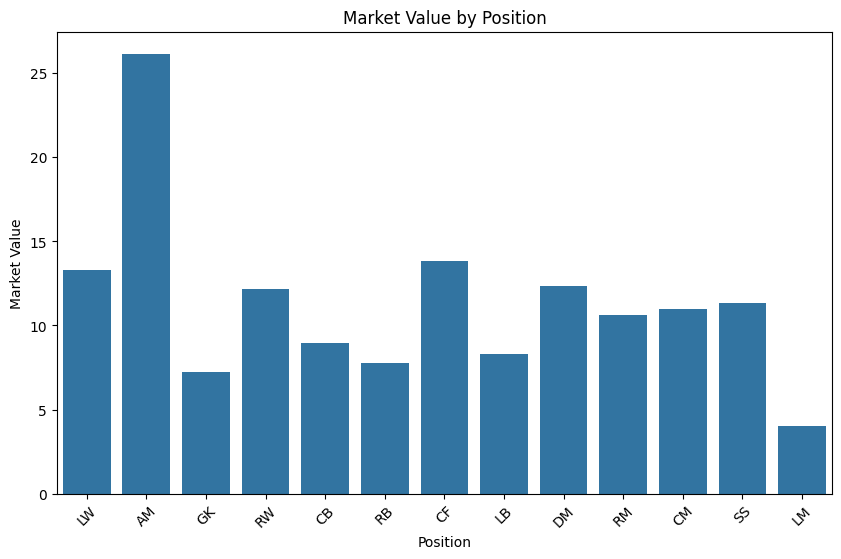

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(data = df, x='position', y='market_value', errorbar=None)
plt.xticks(rotation=45)

plt.title("Market Value by Position")
plt.xlabel('Position')
plt.ylabel('Market Value')
plt.show()

Here We can See Position matters alot for market value of a player
- 'AM' Position players have higher market value

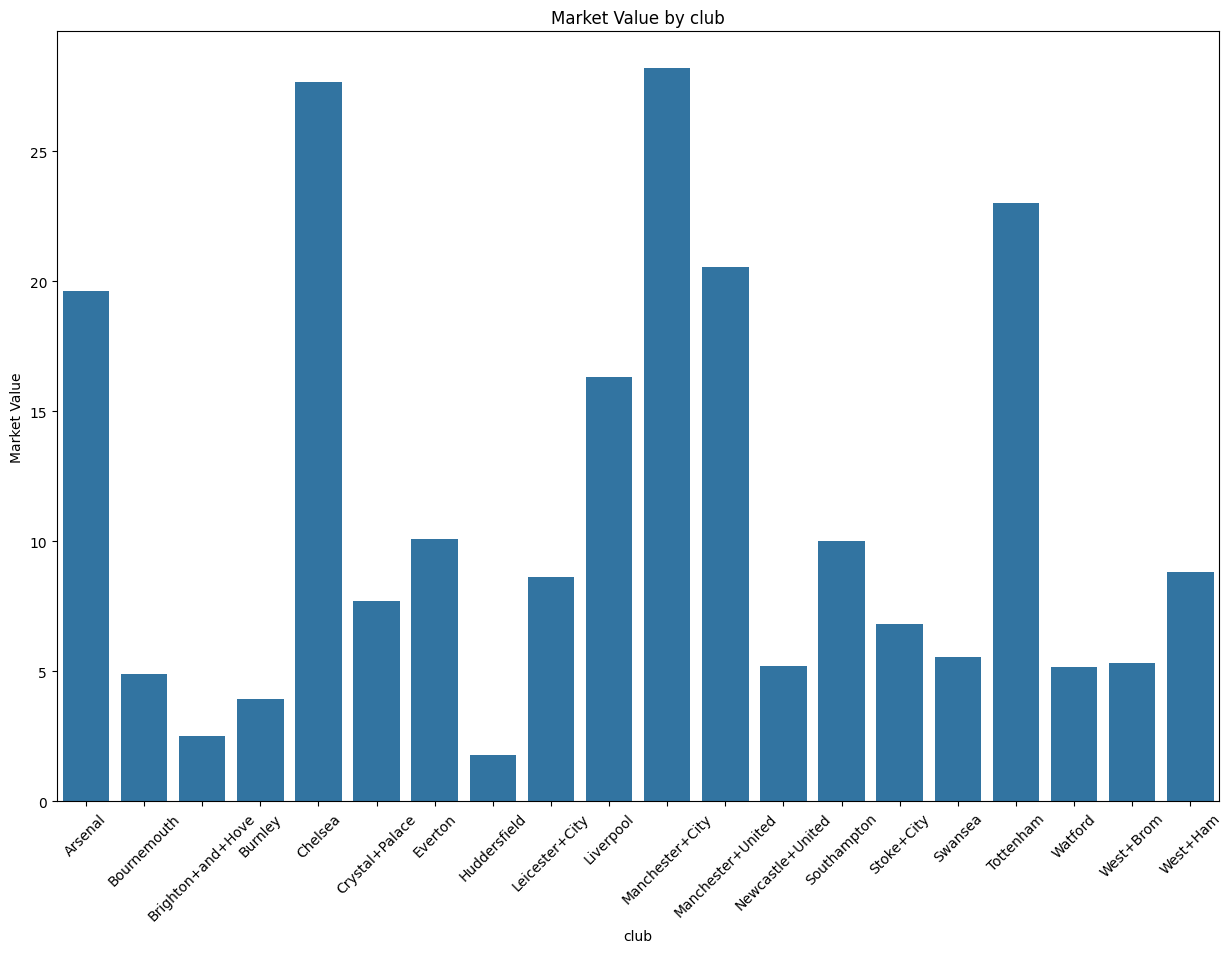

In [156]:
plt.figure(figsize=(15, 10))
sns.barplot(data = df, x='club', y='market_value', errorbar=None)
plt.xticks(rotation=45)

plt.title("Market Value by club")
plt.xlabel('club')
plt.ylabel('Market Value')
plt.show()

Here We can see Players with higher market value usually belongs to specific club which are-:
- Arsenal
- Chelsea
- Manchester City
- Manchester United
- Tottenham

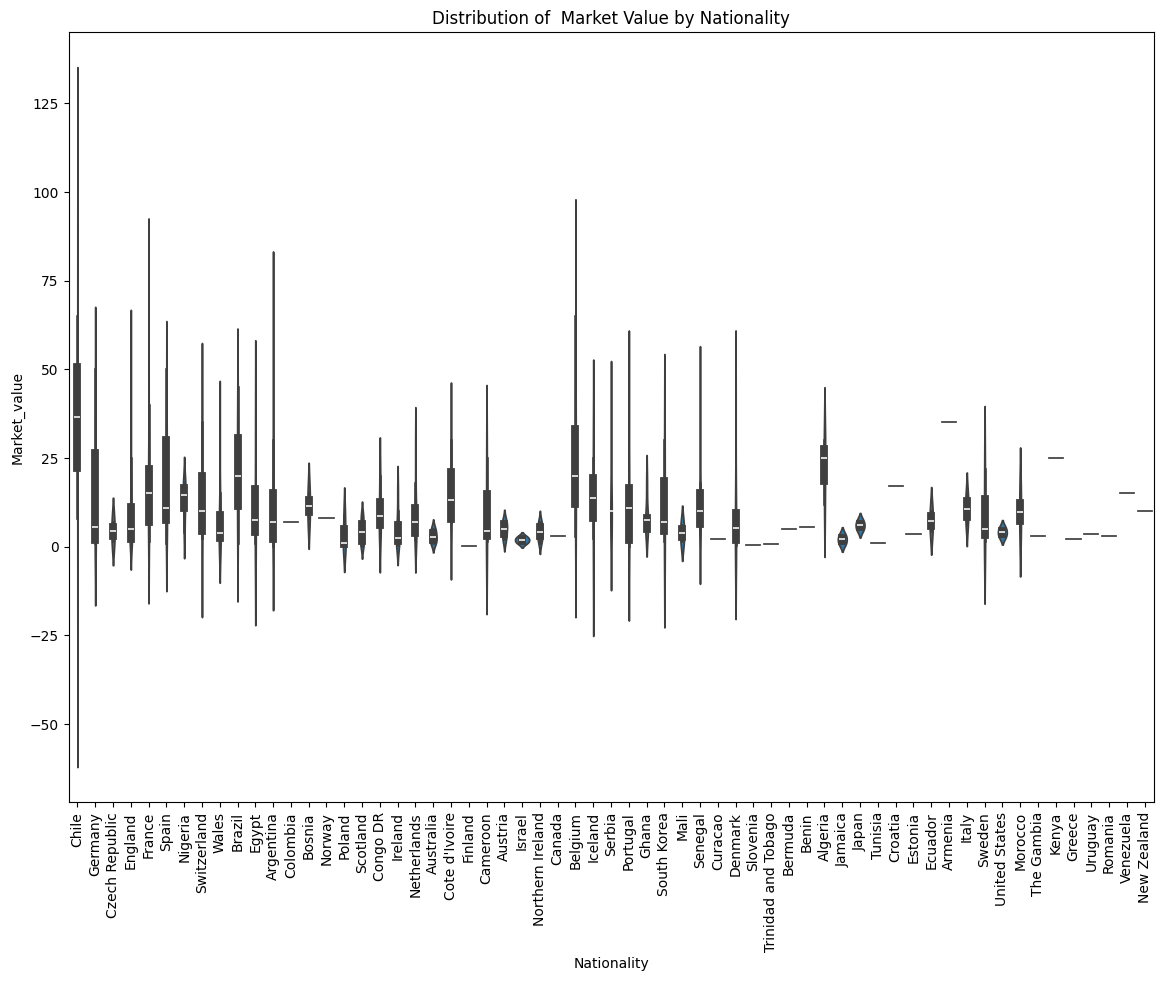

In [157]:
plt.figure(figsize=(14,10))

sns.violinplot(data =df, x='nationality',y='market_value')
plt.xlabel('Nationality')
plt.ylabel('Market_value')
plt.title('Distribution of  Market Value by Nationality')

plt.xticks(rotation=90)
plt.show()

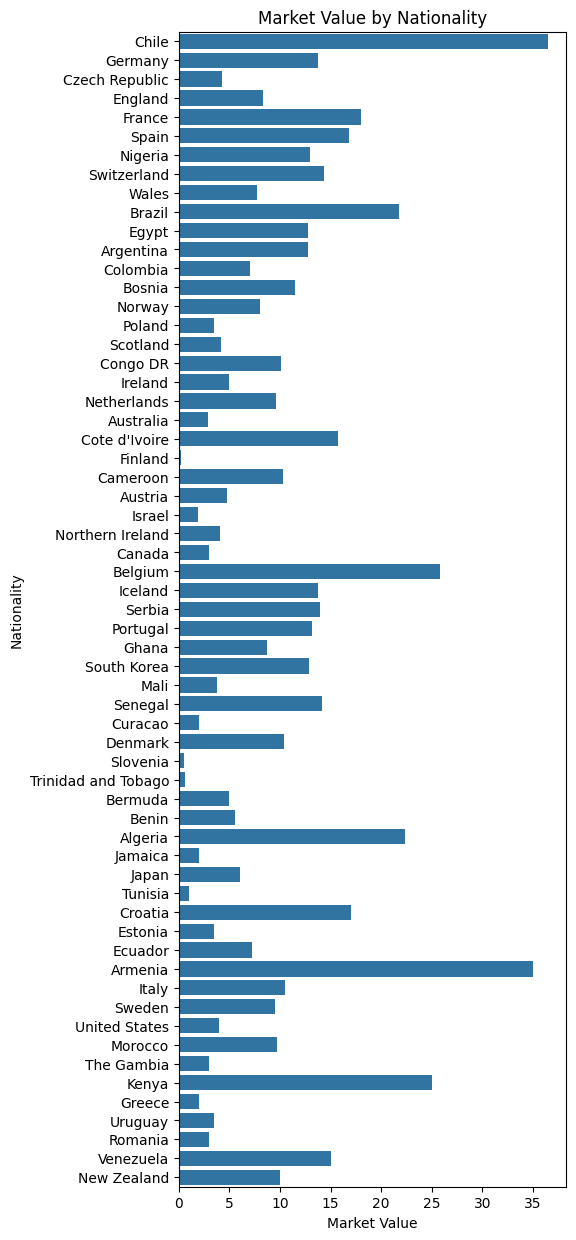

In [158]:
plt.figure(figsize=(5,15))
sns.barplot(data = df, x='market_value', y='nationality',errorbar=None)
plt.xlabel('Market Value')
plt.ylabel('Nationality')
plt.title('Market Value by Nationality')

plt.show()

Here we can see How Nationality of a player affects his market value as well 
- Chile and Armenia  are two countries with highest market value players

### Heat Map for Correlation of variables
we will include-:
- Age
- Market Value
- Page Views
- fpl Value
- fpl Points
- fpl Sel

Before considering fpl_sel for correlation technique we need to convert it from object to int type variable

In [159]:
df['fpl_sel'] = df['fpl_sel'].str.replace('%',"").astype(float)


In [160]:
print(df['fpl_sel'])

0      17.1
1       5.6
2       5.9
3       1.5
4       0.7
       ... 
456     0.4
457     0.2
458     0.3
459     5.9
460     0.1
Name: fpl_sel, Length: 461, dtype: float64


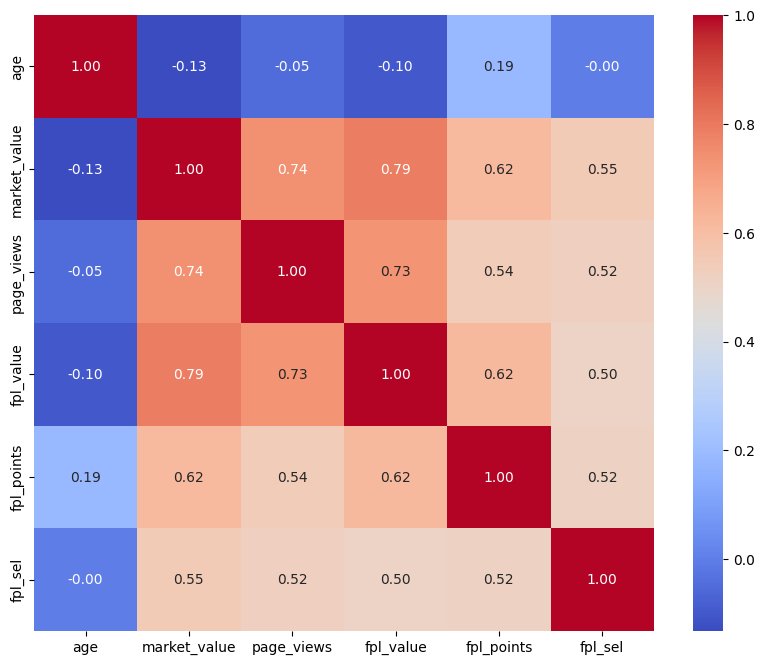

In [161]:

num_Cols = ['age','market_value','page_views','fpl_value','fpl_points','fpl_sel']

correlation_matrix = df[num_Cols].corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')

plt.show()

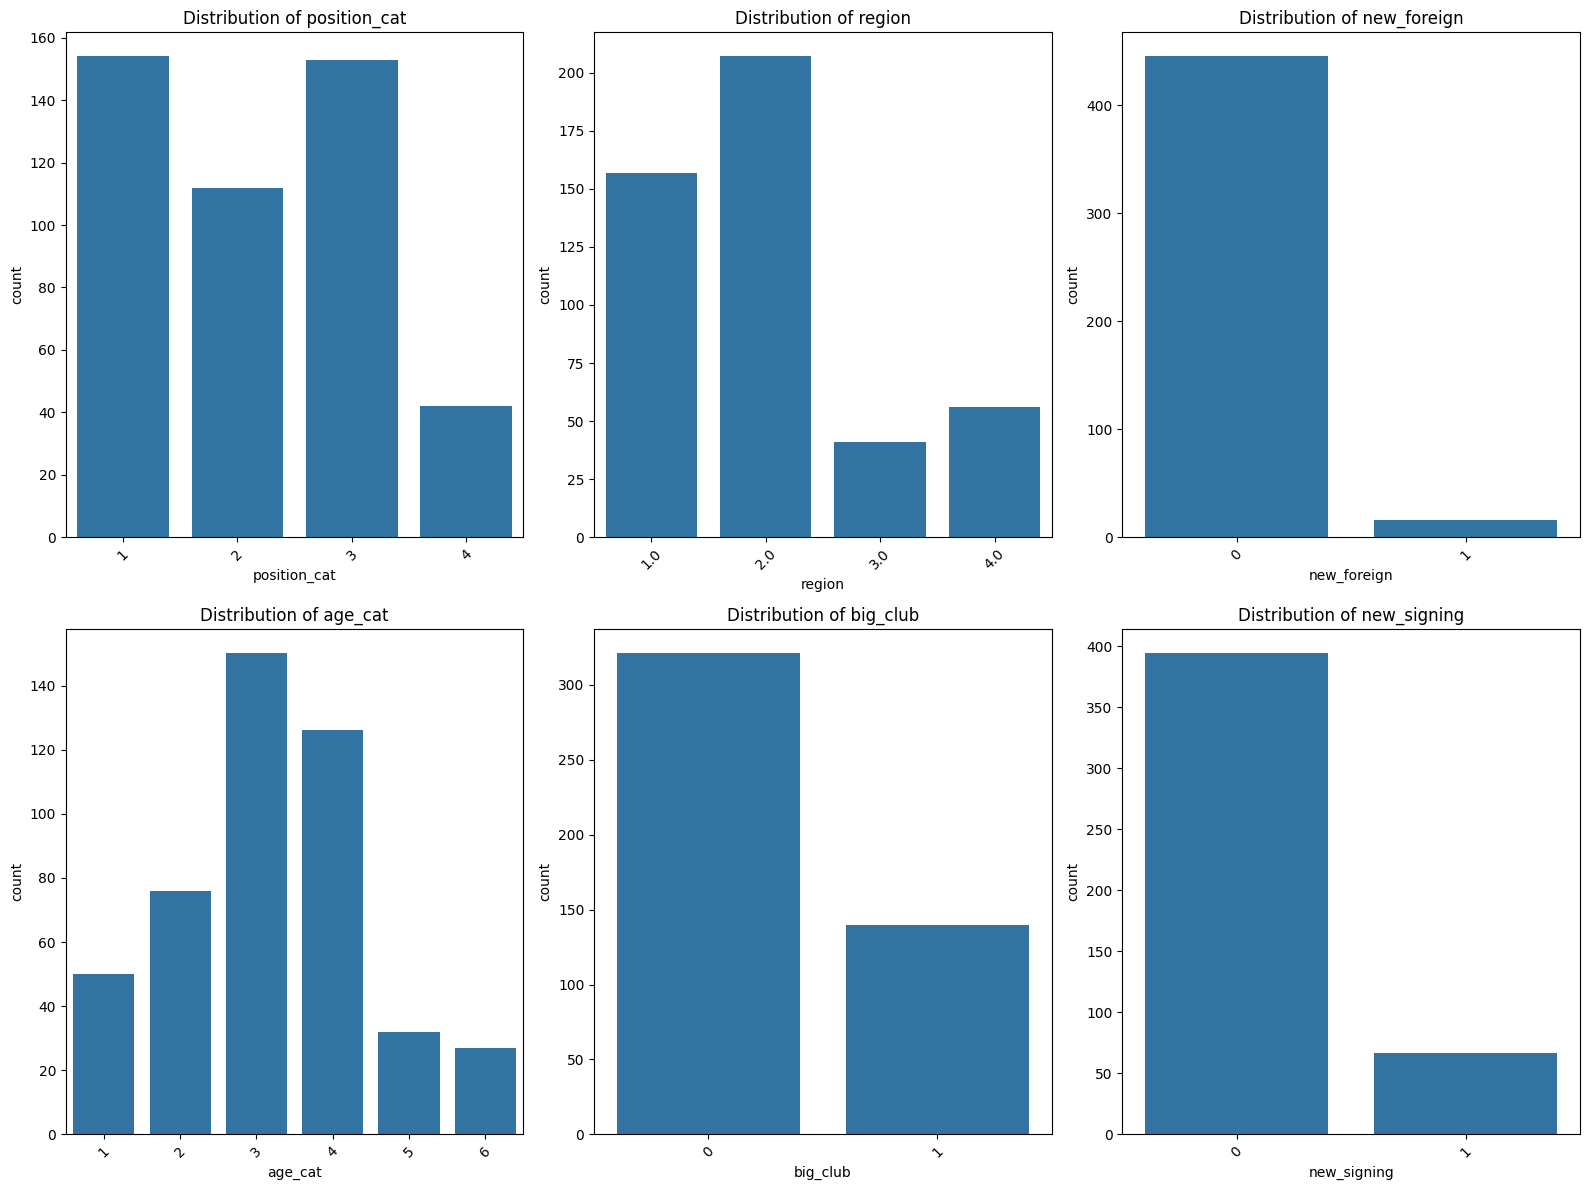

In [162]:
plt.figure(figsize=(16,12))

categorical_cols = ['position_cat','region','new_foreign','age_cat','big_club','new_signing']

for i,col in enumerate(categorical_cols,1):
    plt.subplot(2,3,i)
    sns.countplot(data=df,x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Visualizing relationship with Market Value

- position_cat :
   - 1 for attackers

   - 2 for midfielders

   - 3 for defenders

   - 4 for goalkeepers

- region:
    - 1 for England
    - 2 for EU
    - 3 for Americas
    - 4 for Rest of World

- new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)
- age_cat
- big_club: Whether one of the Top 6 clubs
- new_signing: Whether a new signing for 2017/18 (till 20th July)

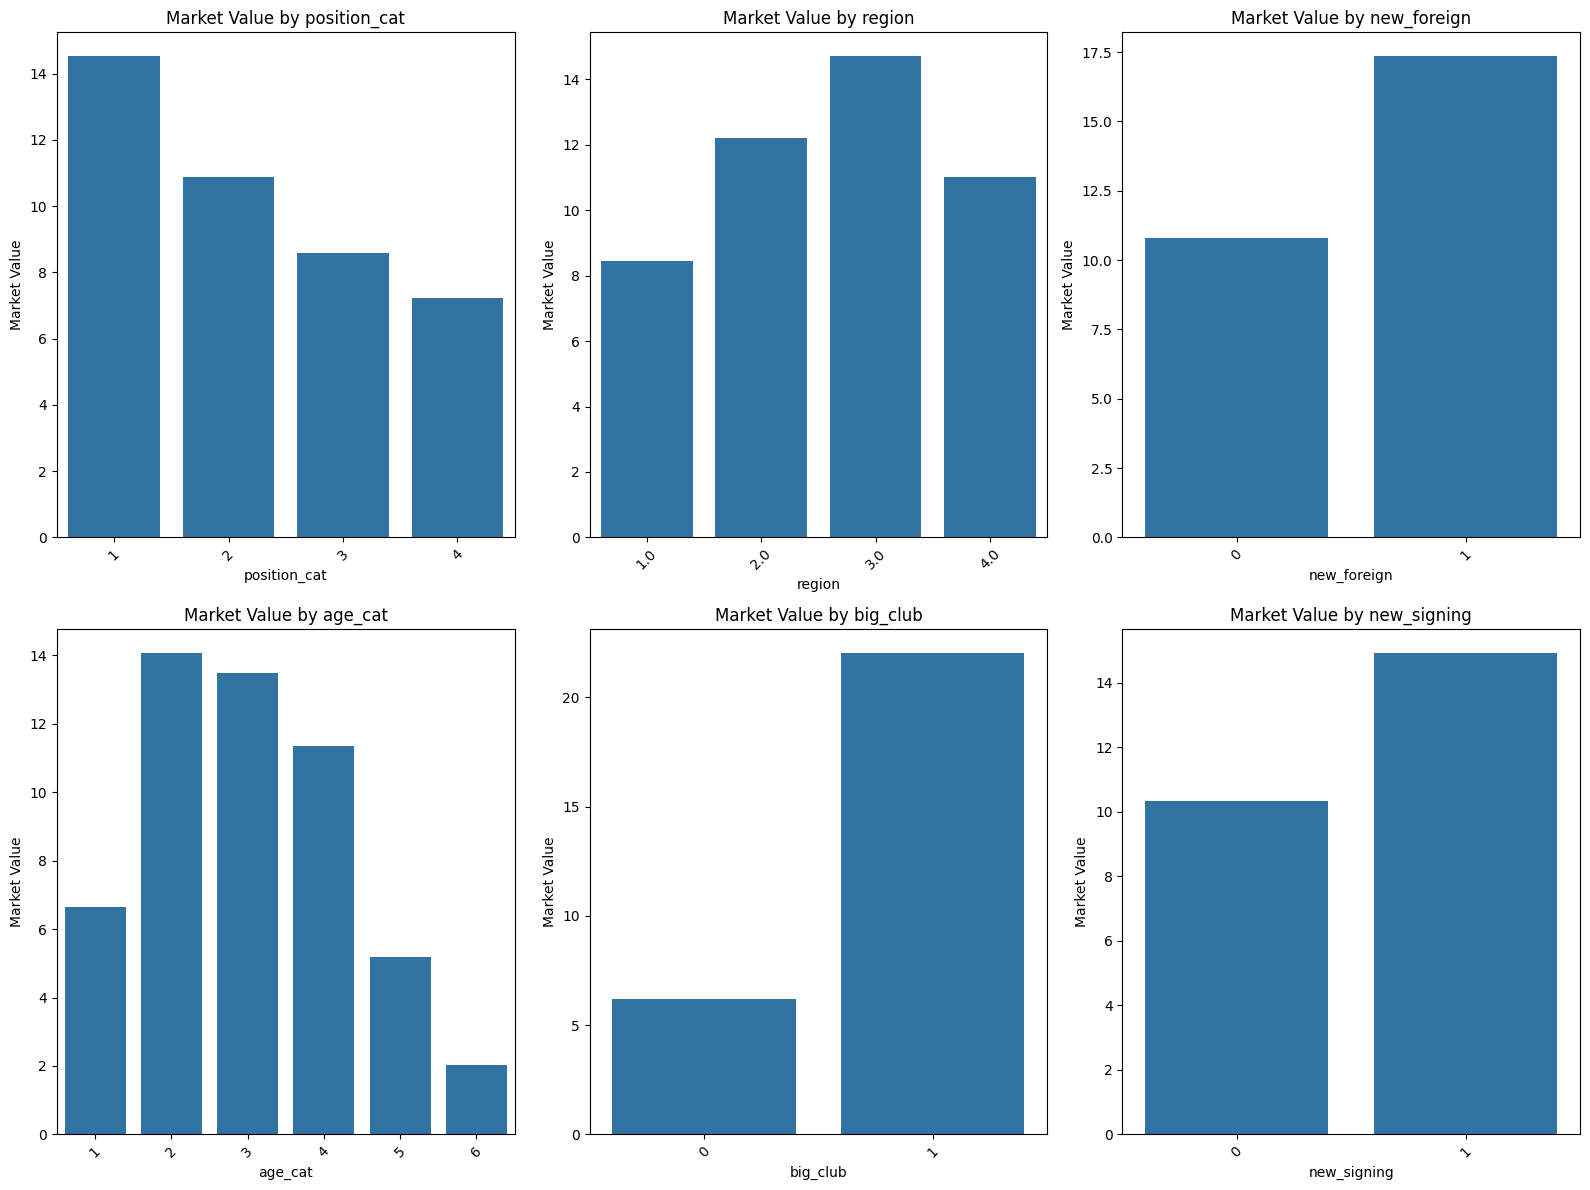

In [163]:
plt.figure(figsize=(16, 12))
for i,col in enumerate(categorical_cols,1):
    plt.subplot(2,3,i)
    sns.barplot(data = df, x=col , y='market_value', errorbar=None)
    plt.xticks(rotation=45)
    plt.title(f'Market Value by {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Market Value')
    
plt.tight_layout()
plt.show()